# **Neural Networks Project**

Objective is to build a model that can indentify house numbers from an image.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Importing libaries:**

In [2]:
import h5py
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils

**Visualizing first 10 images in train set:**

In [3]:
h5f = h5py.File('/content/drive/My Drive/PGP-AIML/SVHN_single_grey1.h5', 'r')
X_train = h5f['X_train'][:]
y_train1 = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test1 = h5f['y_test'][:]
h5f.close()

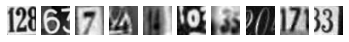

In [4]:
for i in range(10):  
    plt.subplot(1, 10, i + 1)
    plt.imshow(X_train[i].reshape((32, 32)),cmap = plt.cm.binary)
    plt.axis('off')
plt.show()

**Data pre-processing:**

In [5]:
seed = 7
np.random.seed(seed)

In [6]:
X_train = X_train.reshape(X_train.shape[0], 1024)
X_test = X_test.reshape(X_test.shape[0], 1024)

In [7]:
X_train = X_train / 255.0
X_test = X_test / 255.0

y_train = np_utils.to_categorical(y_train1)
y_test = np_utils.to_categorical(y_test1)

In [8]:
num_classes = y_test.shape[1]
num_hidden = 32

In [9]:
x_tr = []
for i in range(42000):
    x_tr.append(X_train[i,:].flatten())
x_te = []
for i in range(18000):
    x_te.append(X_test[i,:].flatten())

In [10]:
x_tr =x_tr[:2000]
x_te =x_te[:2000]
y_tr = y_train1[0:2000]
y_te = y_test1[0:2000]

In [11]:
import tensorflow as tf
tf.__version__

'2.5.0'

**Neural network model:**

In [12]:
model = Sequential()

In [13]:
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation ='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation ='relu'))
model.add(Dense(10, activation='softmax'))

In [14]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
model.fit(X_train, y_train, epochs=10, batch_size=256, verbose=1) 

Epoch 1/10
165/165 [==============================] - 25s 22ms/step - loss: 2.3065 - accuracy: 0.1001
Epoch 2/10
165/165 [==============================] - 4s 22ms/step - loss: 2.2771 - accuracy: 0.1198
Epoch 3/10
165/165 [==============================] - 4s 22ms/step - loss: 2.0225 - accuracy: 0.2401
Epoch 4/10
165/165 [==============================] - 4s 22ms/step - loss: 1.5922 - accuracy: 0.4433
Epoch 5/10
165/165 [==============================] - 4s 22ms/step - loss: 1.3643 - accuracy: 0.5454
Epoch 6/10
165/165 [==============================] - 4s 22ms/step - loss: 1.2353 - accuracy: 0.5959
Epoch 7/10
165/165 [==============================] - 4s 22ms/step - loss: 1.1737 - accuracy: 0.6183
Epoch 8/10
165/165 [==============================] - 4s 22ms/step - loss: 1.0710 - accuracy: 0.6581
Epoch 9/10
165/165 [==============================] - 4s 22ms/step - loss: 1.0280 - accuracy: 0.6764
Epoch 10/10
165/165 [==============================] - 4s 22ms/step - loss: 0.9981 - accur

In [16]:
results = model.evaluate(X_test, y_test)

563/563 [==============================] - 2s 3ms/step - loss: 1.0469 - accuracy: 0.6603


In [17]:
print(model.metrics_names)
print(results)    

['loss', 'accuracy']
[1.046895980834961, 0.6603333353996277]


In [18]:
y_pred=model.predict_classes(X_test)

In [19]:
test_y=[]
for val in y_test:
  test_y.append(np.argmax(val))

In [20]:
from sklearn import metrics

cm = metrics.confusion_matrix(test_y, y_pred)

cm

array([[1232,   76,   37,   26,   70,   37,   56,   47,  117,  116],
       [  62, 1287,   45,   67,  165,   42,   20,   72,   40,   28],
       [  67,   67, 1319,   65,   62,   30,   13,  105,   30,   45],
       [  76,  103,   90, 1026,   62,  182,   20,   73,   61,   26],
       [  50,   96,   39,   19, 1415,   32,   63,   12,   49,   37],
       [  99,   71,   27,  164,   61, 1030,  178,   34,   71,   33],
       [  99,   62,   21,   25,  124,   84, 1189,   16,  202,   10],
       [  53,   85,  151,   48,   29,   39,   15, 1336,   14,   38],
       [ 126,   77,   32,   42,  107,  104,  274,   22,  975,   53],
       [ 240,   76,   49,   83,   70,   75,   15,   53,   66, 1077]])